In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax


In [77]:
df=pd.read_csv("knowledge_level.csv")

In [78]:
df=df.drop(columns='knowledge_level')
##df=df[:50]

In [79]:
df.head()


,repetition_time,Study_time
0,0.00,0.00
1,0.08,0.90
2,0.06,0.33
3,0.10,0.30
4,0.08,0.24


In [80]:
df.shape

(258, 2)

In [81]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   repetition_time  258 non-null    float64
 1   Study_time       258 non-null    float64
dtypes: float64(2)
memory usage: 4.2 KB


In [82]:
df.describe()

,repetition_time,Study_time
count,258.000000,258.000000
mean,0.355674,0.458539
std,0.211962,0.255211
min,0.000000,0.000000
25%,0.210000,0.250000
50%,0.302500,0.500000
75%,0.497500,0.660000
max,0.900000,0.930000


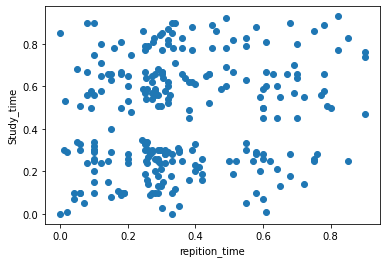

In [83]:
plt.scatter(df['repetition_time'],df['Study_time'])
plt.xlabel('repition_time')
plt.ylabel('Study_time')
plt.show()

In [84]:
from sklearn import preprocessing

data_scaled=df.copy()
data_scaled=preprocessing.scale(df)
data_scaled

array([[-1.68126919, -1.80019743],
       [-1.30311004,  1.73315205],
       [-1.39764983, -0.50463595],
       [-1.20857025, -0.62241427],
       [-1.30311004, -0.8579709 ],
       [-0.97222078,  0.79092552],
       [-1.20857025,  0.39833113],
       [-1.5867294 , -1.76093799],
       [-1.01949068, -0.81871146],
       [-1.68126919,  1.53685485],
       [-0.8304111 ,  1.3798171 ],
       [-1.39764983, -0.62241427],
       [-1.20857025, -0.46537652],
       [-1.20857025,  1.73315205],
       [-0.73587132,  0.55536889],
       [-1.11403047,  1.34055766],
       [-1.35037993, -1.60390024],
       [-0.49952185, -0.50463595],
       [-0.1686326 , -0.66167371],
       [-0.31044228,  0.39833113],
       [-0.35771217, -1.01500866],
       [-0.26317238,  0.79092552],
       [-0.40498206,  0.75166608],
       [-0.21590249, -0.70093315],
       [-0.31044228, -0.81871146],
       [-0.26317238,  1.53685485],
       [-0.35771217, -1.40760304],
       [-0.4758869 , -0.81871146],
       [-0.14499765,

In [85]:
from sklearn.cluster import KMeans
##within cluster sum of squares(wcss)
w=[]
for i in range(1,8):
  kmeans=KMeans(n_clusters =i,random_state=0)
  kmeans.fit(data_scaled)
  w.append(kmeans.inertia_)



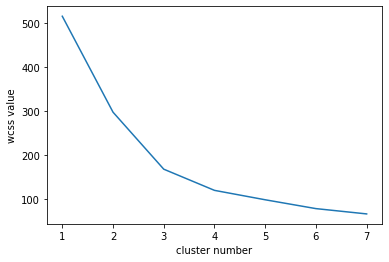

In [86]:
plt.plot(range(1,8),w)
plt.xlabel("cluster number")
plt.ylabel("wcss value")
plt.show()

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [88]:
x=linkage(data_scaled,method='ward')

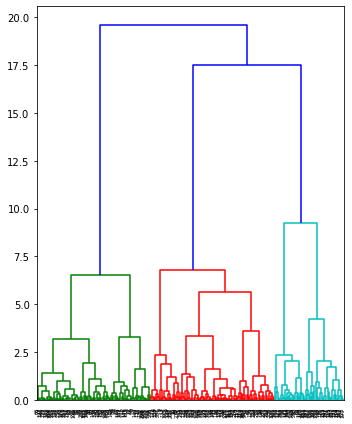

In [89]:
fig,ax = plt.subplots(figsize=(5,6))
ax=dendrogram(x)
plt.tight_layout()
plt.show()

In [90]:
from sklearn.cluster import AgglomerativeClustering
ag= AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
ag.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [91]:
cluster_data=df.copy()
cluster_data['cluster_pred']=ag.fit_predict(data_scaled)

In [92]:
cluster_data.head()

,repetition_time,Study_time,cluster_pred
0,0.00,0.00,1
1,0.08,0.90,0
2,0.06,0.33,1
3,0.10,0.30,1
4,0.08,0.24,1


In [93]:
 ag.labels_

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 3, 2, 3, 2, 2, 3, 3, 2, 0, 3, 3, 2, 2, 3, 3, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 2, 2, 3, 2, 2, 0, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 2, 0, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 3, 3, 0, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2])

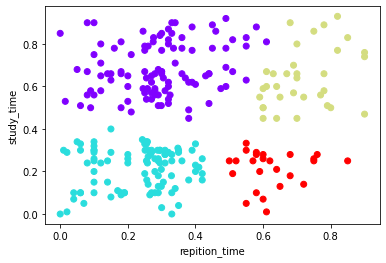

In [94]:
plt.scatter(df['repetition_time'],df['Study_time'],c=cluster_data['cluster_pred'],cmap='rainbow')
plt.xlabel('repition_time')
plt.ylabel('study_time')
plt.show()